In [11]:
import  pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [12]:
df = pd.read_csv("kmeans2.txt",sep="\t")

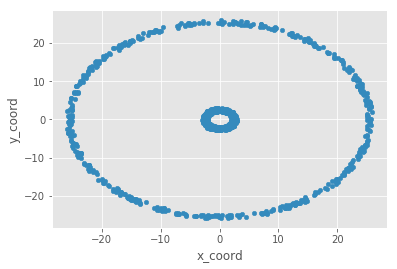

In [13]:
%matplotlib inline
df.plot(x='x_coord',y='y_coord',kind='scatter')

In [14]:
from sklearn.cluster import KMeans
kmeans_clusters = KMeans(2).fit_predict(X=np.array(df)[:,1:])

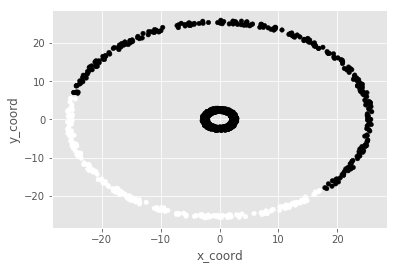

In [15]:
df.plot(kind='scatter', x='x_coord', y='y_coord', c=kmeans_clusters)

the algorithm was unable to identify the two natural clusters in the data—because the center ring of data is the same distance to the outer ring at many points, the randomly assigned cluster center (which is more likely to land somewhere in the outer ring) is a mathematically sound choice for the nearest cluster

# k-medoids

In [18]:
from pyclust import KMedoids
kmedoids_clusters = KMedoids(2).fit_predict(np.array(df)[:,1:])

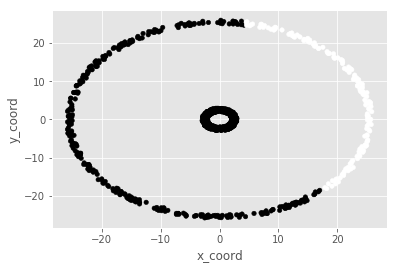

In [19]:
df.plot(kind='scatter', x='x_coord', y='y_coord', c=kmedoids_clusters)

There isn't much improvement over k-means

Perhaps instead of generating a similarity between datapoints in a single stage, we could examine hierarchical measures of similarity and clustering, which is the goal of the agglomerative clustering algorithms

# Agglomerative clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clusters = AgglomerativeClustering(2,linkage='ward').fit_predict(X=np.array(df)[:,1:])

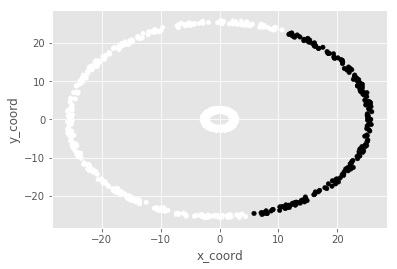

In [21]:
df.plot(kind='scatter', x='x_coord', y='y_coord', c=agglomerative_clusters)

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


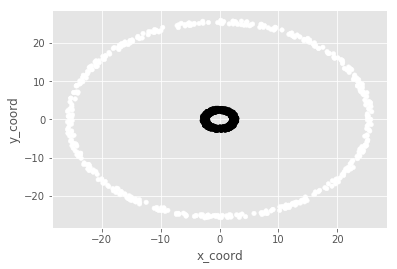

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
L = kneighbors_graph(np.array(df)[:,1:], n_neighbors=10, include_self=False)
L = 0.5 * (L + L.T)
agglomerative_clusters = AgglomerativeClustering(n_clusters=2,connectivity=L,linkage='average').fit_predict(X=np.array(df)[:,1:])
df.plot(kind='scatter', x='x_coord', y='y_coord', c=agglomerative_clusters)

constructing this neighborhood graph and partitioning it into sub graphs (splitting the whole graph into a set of nodes and edges that are primarily connected to each other, rather than to other elements of the network) is equivalent to performing k-means clustering on a transformed distance matrix, an approach known as Spectral Clustering

# Spectral Clustering

In [28]:
import sklearn
spectral_clusters = sklearn.cluster.SpectralClustering(2).fit_predict(np.array(df)[:,1:])

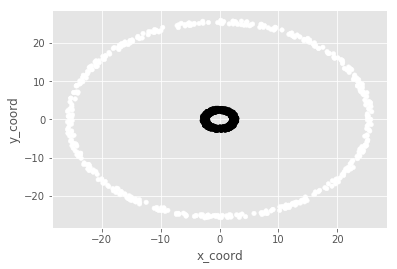

In [29]:
df.plot(kind='scatter', x='x_coord', y='y_coord', c=spectral_clusters)

successfully capture this nonlinear separation boundary because we've represented the points in the space of the greatest variation in pairwise distance, which is the difference between the inner and outermost circle in the data